# 2.Feature Selection-With Correlation

In this step we will be removing the features which are highly correlated

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df["MEDV"]=data.target

C:\Users\ISHITA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X=df.drop("MEDV",axis=1)
y=df["MEDV"]

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train, X_test.shape

(        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
 141  1.62864   0.0  21.89   0.0  0.624  5.019  100.0  1.4394  4.0  437.0   
 272  0.11460  20.0   6.96   0.0  0.464  6.538   58.7  3.9175  3.0  223.0   
 135  0.55778   0.0  21.89   0.0  0.624  6.335   98.2  2.1107  4.0  437.0   
 298  0.06466  70.0   2.24   0.0  0.400  6.345   20.1  7.8278  5.0  358.0   
 122  0.09299   0.0  25.65   0.0  0.581  5.961   92.9  2.0869  2.0  188.0   
 ..       ...   ...    ...   ...    ...    ...    ...     ...  ...    ...   
 323  0.28392   0.0   7.38   0.0  0.493  5.708   74.3  4.7211  5.0  287.0   
 192  0.08664  45.0   3.44   0.0  0.437  7.178   26.3  6.4798  5.0  398.0   
 117  0.15098   0.0  10.01   0.0  0.547  6.021   82.6  2.7474  6.0  432.0   
 47   0.22927   0.0   6.91   0.0  0.448  6.030   85.5  5.6894  3.0  233.0   
 172  0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961  5.0  296.0   
 
      PTRATIO       B  LSTAT  
 141     21.2  396.90  34.41  
 272     18.

In [10]:
len(X_train)

354

In [11]:
len(X_test)

152

To avoid overfitting we use train_test_split

AttributeError: 'QuadMesh' object has no property 'cmp'

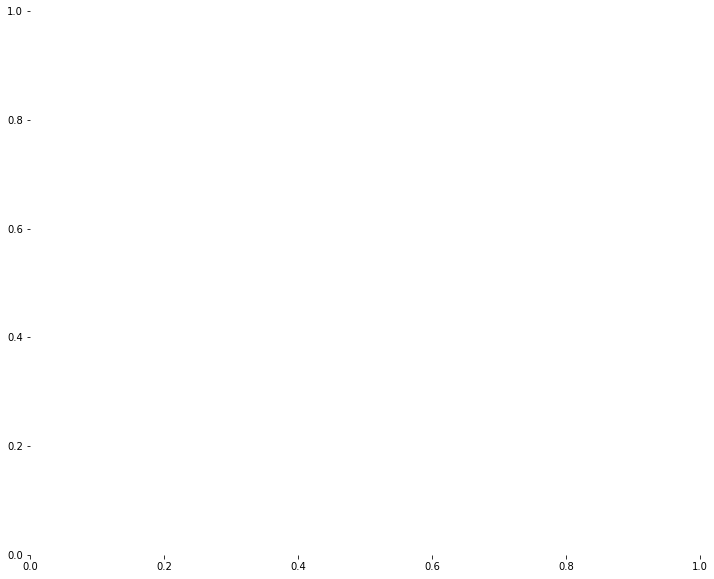

In [12]:
import seaborn as sns
#Using pearson correlation
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmp=plt.cm.CMRmap_r)
plt.show()

In [ ]:
X_train.corr()


In [ ]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
a=X_train.drop(corr_features,axis=1)
b=X_test.drop(corr_features,axis=1)
a
b

In [ ]:
# df=pd.read_csv('santanderTrain.csv',nrows=50000)
df=pd.read_csv("santanderTrain.csv",nrows=1000)
X=df.drop(labels=['TARGET'],axis=1)
y=df['TARGET']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
import seaborn as sns
# Using Pearson Correlation
corrmat=X_train.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [ ]:
corr_features=correlation(X_train,1)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X_train.drop(corr_features,axis=1)